In [1085]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.layers import Activation, Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPool2D
%matplotlib inline

In [1086]:
 df = pd.read_csv('Placement_Data_Full_Class.csv')

In [1087]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [1088]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [1089]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [1090]:
df['gender'].unique()

array(['M', 'F'], dtype=object)

In [1091]:
df['ssc_b'].unique()

array(['Others', 'Central'], dtype=object)

In [1092]:
df['hsc_s'].unique()

array(['Commerce', 'Science', 'Arts'], dtype=object)

In [1093]:
df['degree_t'].unique()

array(['Sci&Tech', 'Comm&Mgmt', 'Others'], dtype=object)

In [1094]:
df['workex'].unique()

array(['No', 'Yes'], dtype=object)

In [1095]:
df['specialisation'].unique()

array(['Mkt&HR', 'Mkt&Fin'], dtype=object)

In [1096]:
#Dropping these features after doing feature selection
df.drop(['sl_no','salary','hsc_b','ssc_b','hsc_s','gender'],axis=1,inplace=True)

In [1097]:
cat_feats = df.select_dtypes(exclude=[np.number]).columns

In [1098]:
cat_feats

Index(['degree_t', 'workex', 'specialisation', 'status'], dtype='object')

In [1099]:
dataset= pd.get_dummies(df,columns=cat_feats,drop_first=True)

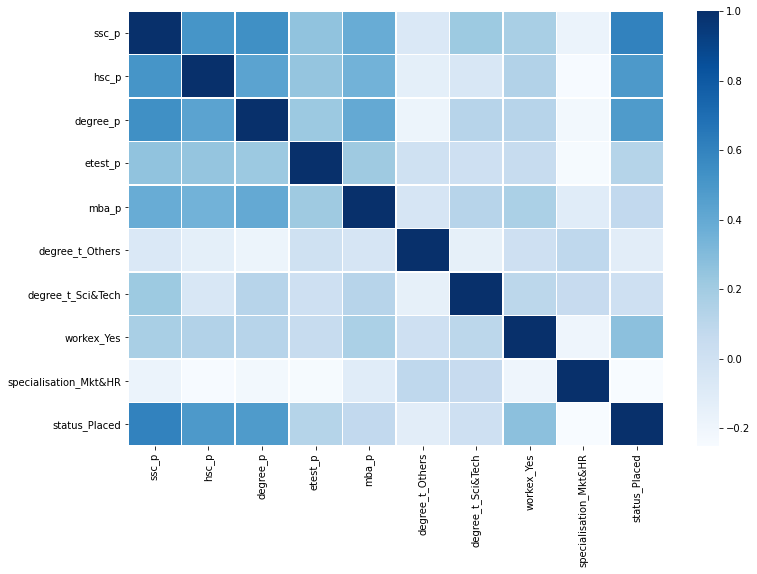

In [1100]:
corr = dataset.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr,cmap='Blues',lw=0.5)

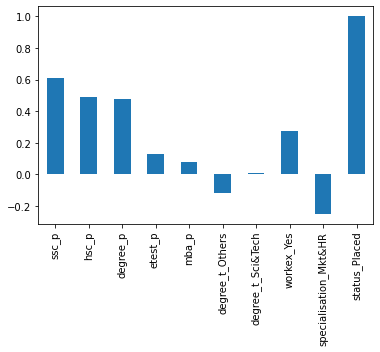

In [1101]:
corr['status_Placed'].plot(kind="bar")

In [1102]:
print ('TOP 5 important features which impact the placements:\n',corr['status_Placed'].sort_values(ascending=False)[1:], '\n')

TOP 5 important features which impact the placements:
 ssc_p                    0.607889
hsc_p                    0.491228
degree_p                 0.479861
workex_Yes               0.276060
etest_p                  0.127639
mba_p                    0.076922
degree_t_Sci&Tech        0.008688
degree_t_Others         -0.117232
specialisation_Mkt&HR   -0.250655
Name: status_Placed, dtype: float64 



In [1103]:
dataset.drop('degree_t_Sci&Tech',axis=1,inplace=True)

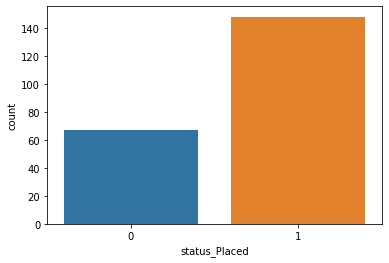

In [1104]:
sns.countplot(dataset['status_Placed'])

In [1105]:
labels=dataset.columns[:-1]
labels

Index(['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'degree_t_Others',
       'workex_Yes', 'specialisation_Mkt&HR'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


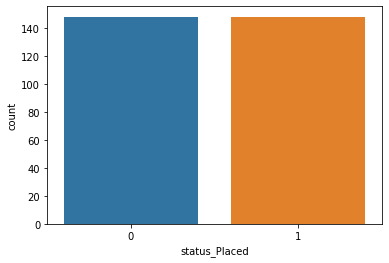

In [1106]:
smote = SMOTE(ratio='minority', n_jobs=-1)
X_sm, y_sm = smote.fit_resample(dataset[labels], dataset['status_Placed'])

dataset = pd.DataFrame(X_sm, columns=labels)
dataset['status_Placed'] = y_sm

sns.countplot(dataset['status_Placed'])

In [1107]:
dataset.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,degree_t_Others,workex_Yes,specialisation_Mkt&HR,status_Placed
0,67.00,91.00,58.00,55.0,58.80,0.0,0.0,1.0,1
1,79.33,78.33,77.48,86.5,66.28,0.0,1.0,0.0,1
2,65.00,68.00,64.00,75.0,57.80,0.0,0.0,0.0,1
3,56.00,52.00,52.00,66.0,59.43,0.0,0.0,1.0,0
4,85.80,73.60,73.30,96.8,55.50,0.0,0.0,0.0,1


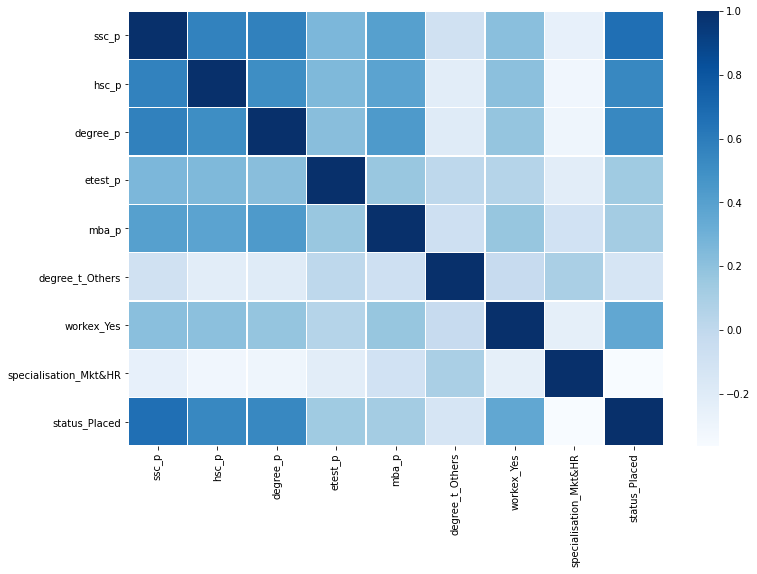

In [1108]:
corr = dataset.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr,cmap='Blues',lw=0.5)

In [1109]:
print ('TOP 5 important features which impact the placements:\n',corr['status_Placed'].sort_values(ascending=False)[1:], '\n') #top 5 values
#print (corr['status_Placed'].sort_values(ascending=False)[-5:], '\n') #bottom 5 values

TOP 5 important features which impact the placements:
 ssc_p                    0.668490
degree_p                 0.538525
hsc_p                    0.538372
workex_Yes               0.357831
etest_p                  0.139964
mba_p                    0.122362
degree_t_Others         -0.130514
specialisation_Mkt&HR   -0.363728
Name: status_Placed, dtype: float64 



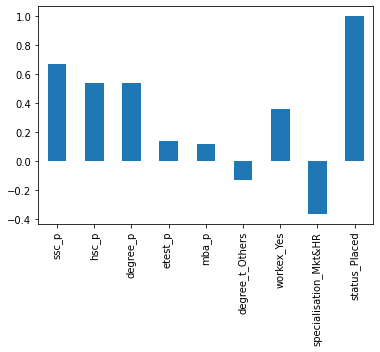

In [1110]:
corr['status_Placed'].plot(kind="bar")

In [1111]:

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [1112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [1113]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [1114]:
print(sc.mean_)
a = sc.mean_
b = a.tolist()
print(b)

[63.98145954 63.33258027 64.24536713 71.1133098  61.5842021   0.08033286
  0.26006111  0.517047  ]
[63.98145954224041, 63.332580271684115, 64.24536712709603, 71.11330980175758, 61.58420209637642, 0.08033285645963001, 0.2600611084810514, 0.5170469977808323]


In [1115]:
print(sc.var_)

[1.05012537e+02 1.16280251e+02 5.18270787e+01 1.48199718e+02
 3.09663546e+01 6.61378909e-02 1.80809206e-01 2.28458180e-01]


In [1116]:
print(sc.scale_)
a = sc.scale_
b = a.tolist()
print(b)

[10.24756249 10.78333208  7.19910263 12.17373066  5.56474209  0.25717288
  0.42521666  0.47797299]
[10.247562493365988, 10.78333208497813, 7.199102632915073, 12.173730657495637, 5.564742093979338, 0.2571728812813913, 0.4252166580627414, 0.4779729905133976]


In [1117]:
ann = tf.keras.models.Sequential()

In [1118]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(Dropout(0.3))

In [1119]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(Dropout(0.3))

In [1120]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [1121]:
ann.compile(optimizer = Adam(learning_rate=0.01), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [1122]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)

In [1123]:
ann.fit(X_train, y_train, batch_size = 10,validation_data = (X_test,y_test), epochs = 200,callbacks=[early_stop])

Epoch 1/200
24/24 [==============================] - 0s 6ms/step - loss: 0.6954 - accuracy: 0.5805 - val_loss: 0.5953 - val_accuracy: 0.7333
Epoch 2/200
24/24 [==============================] - 0s 2ms/step - loss: 0.5801 - accuracy: 0.6653 - val_loss: 0.5075 - val_accuracy: 0.8000
Epoch 3/200
24/24 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.6314 - val_loss: 0.4779 - val_accuracy: 0.8333
Epoch 4/200
24/24 [==============================] - 0s 2ms/step - loss: 0.4969 - accuracy: 0.7500 - val_loss: 0.4122 - val_accuracy: 0.8333
Epoch 5/200
24/24 [==============================] - 0s 2ms/step - loss: 0.4378 - accuracy: 0.7754 - val_loss: 0.3795 - val_accuracy: 0.8500
Epoch 6/200
24/24 [==============================] - 0s 2ms/step - loss: 0.4546 - accuracy: 0.7585 - val_loss: 0.3634 - val_accuracy: 0.8500
Epoch 7/200
24/24 [==============================] - 0s 2ms/step - loss: 0.4362 - accuracy: 0.7797 - val_loss: 0.3430 - val_accuracy: 0.8667
Epoch 8/200
2

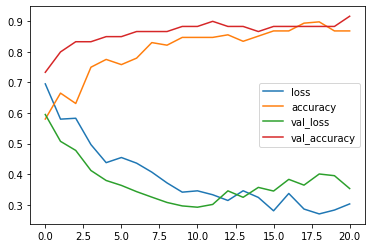

In [1124]:
loss = pd.DataFrame(ann.history.history)
loss.plot()


In [1125]:
#np.round(ann.predict(sc.transform([[67.000000,	91.000000,	58.000000,	55.000000,	58.800000,	1.000000,	1.0,	1.000000,	1.000000,	0.000000,	0.0,	1.000000,	0.000000,	1.000000]])))

In [1126]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]]


In [1127]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print(classification_report(y_test,y_pred))

[[26  4]
 [ 1 29]]
              precision    recall  f1-score   support

           0       0.96      0.87      0.91        30
           1       0.88      0.97      0.92        30

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



In [1135]:
#ann.save('jainuniv_feature.h5')

# **Logistic Regression**

In [1128]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C= 0.5, penalty= 'l2', solver= 'lbfgs')
classifier.fit(X_train, y_train)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [1129]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[26  4]
 [ 1 29]]
              precision    recall  f1-score   support

           0       0.96      0.87      0.91        30
           1       0.88      0.97      0.92        30

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



In [1130]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 89.84 %
Standard Deviation: 4.09 %


In [1131]:
parameters = [{'C': [0.01,0.25, 0.5, 0.75, 1,10],'penalty': ['l2','none'],
               'solver':['lbfgs']},
              {'C': [0.01,0.25, 0.5, 0.75, 1,10],'penalty': ['l1'],
               'solver':['liblinear']}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and

Best Accuracy: 89.76 %
Best Parameters: {'C': 0.01, 'penalty': 'none', 'solver': 'lbfgs'}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and

# **Random Forest Classification**

In [1132]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion = 'entropy')
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [1133]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[25  5]
 [ 1 29]]
              precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.85      0.97      0.91        30

    accuracy                           0.90        60
   macro avg       0.91      0.90      0.90        60
weighted avg       0.91      0.90      0.90        60



In [1134]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 88.99 %
Standard Deviation: 3.38 %
